# Fronteira Eficiente e Teoria de Markowitz

In [110]:
from pandas_datareader import data as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use("fivethirtyeight")

# Seleção de ativos

In [111]:
ativos = ["VALE3.SA","FLRY3.SA","ITSA4.SA","JBSS3.SA","BBAS3.SA"]

# Período de análise

In [112]:
dataInicio = "2016-01-01"
dataFim = datetime.today().strftime("%Y-%m-%d")

# Pegar ultimo fechamento dos ativos escolhidos

In [113]:
df = pd.DataFrame()
for ativo in ativos:
  df[ativo] = web.DataReader(ativo, data_source="yahoo", start=dataInicio, end=dataFim)["Adj Close"]
  df

# Comportamento dos ativos selecionados no período analisado

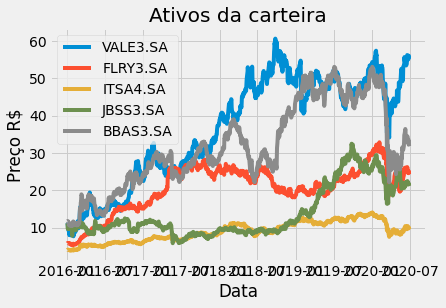

In [114]:
titulo = "Ativos da carteira"
carteiraTeste = df

for i in carteiraTeste.columns.values:
  plt.plot(carteiraTeste[i], label=i)

plt.title(titulo)
plt.xlabel("Data")
plt.ylabel("Preço R$")
plt.legend(carteiraTeste.columns.values)
plt.show()

# Retorno diário dos ativos

In [115]:
retornoDia = df.pct_change()
retornoDia

,VALE3.SA,FLRY3.SA,ITSA4.SA,JBSS3.SA,BBAS3.SA
Date,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.013396,0.011803,0.016666,-0.049793,0.003511
2016-01-06,-0.073482,-0.005185,0.008942,-0.091703,0.000000
2016-01-07,-0.059483,0.001303,-0.014770,0.057692,-0.023793
2016-01-08,-0.033914,0.003904,0.000000,0.018182,0.000000
...,...,...,...,...,...
2020-06-22,-0.003081,-0.012346,-0.024976,-0.031753,-0.020625
2020-06-23,0.010727,0.014113,-0.008867,-0.005543,0.008724
2020-06-24,-0.003598,-0.023459,-0.028827,0.013934,-0.039069


# Matriz de covariancia dos ativos

In [116]:
matrixCovariancia = retornoDia.cov() * 252
matrixCovariancia

,VALE3.SA,FLRY3.SA,ITSA4.SA,JBSS3.SA,BBAS3.SA
VALE3.SA,0.251188,0.044718,0.060572,0.065129,0.094733
FLRY3.SA,0.044718,0.120088,0.049460,0.051792,0.075480
ITSA4.SA,0.060572,0.049460,0.107491,0.056604,0.125911
JBSS3.SA,0.065129,0.051792,0.056604,0.328742,0.085820
BBAS3.SA,0.094733,0.075480,0.125911,0.085820,0.233867


# Otimização

In [117]:
#pip install PyPortfolioOpt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
from pypfopt import cla

In [118]:
#Retornos esperados e matriz de covariância
media = expected_returns.mean_historical_return(carteiraTeste)
s = risk_models.sample_cov(carteiraTeste)

# The Critical Line Algorithm (PyPortfolioOpt)

In [119]:
#Markowitz
cla = cla.CLA(media, s)

#Escolha entre miníma volatilidade ou carteira ideal
pesos = cla.max_sharpe()
#pesos = cla.min_volatility()

# Detalhes da Carteira

In [120]:
clean_weights = cla.clean_weights()
print("Pesos: ", clean_weights)
cla.portfolio_performance(verbose=True, risk_free_rate=0.0225)

Pesos:  OrderedDict([('VALE3.SA', 0.30946), ('FLRY3.SA', 0.5625), ('ITSA4.SA', 0.07685), ('JBSS3.SA', 0.05118), ('BBAS3.SA', 0.0)])
Expected annual return: 40.3%
Annual volatility: 30.3%
Sharpe Ratio: 1.26


(0.4028695725657641, 0.3029268849575374, 1.2556481166043818)

# Alocação do portifólio

In [121]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

ultimosPrecos = get_latest_prices(carteiraTeste)
pesos = clean_weights
valorPortifolio = 5000
da = DiscreteAllocation(pesos, ultimosPrecos, valorPortifolio)

alocado, resto = da.lp_portfolio()
print("Qtd de cotas: ", alocado)
print("Resto (R$):", resto)

Qtd de cotas:  {'VALE3.SA': 28.0, 'FLRY3.SA': 115.0, 'ITSA4.SA': 40.0, 'JBSS3.SA': 12.0}
Resto (R$): 0.679962158203125


# Fronteira Eficiente

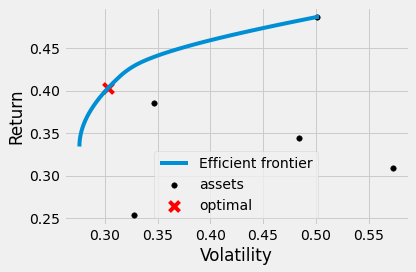

In [122]:
#Plotting // Gerar gráfico
plotting.plot_efficient_frontier(cla)